In [51]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
df = pd.read_csv('data/train.csv')

In [53]:
df.shape

(891, 12)

In [54]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [56]:
df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

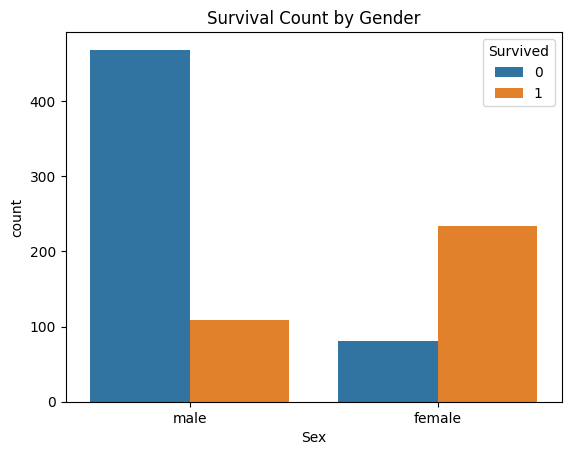

In [57]:
sns.countplot(data = df, x='Sex', hue='Survived')
plt.title('Survival Count by Gender')
plt.show()

In [58]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [59]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

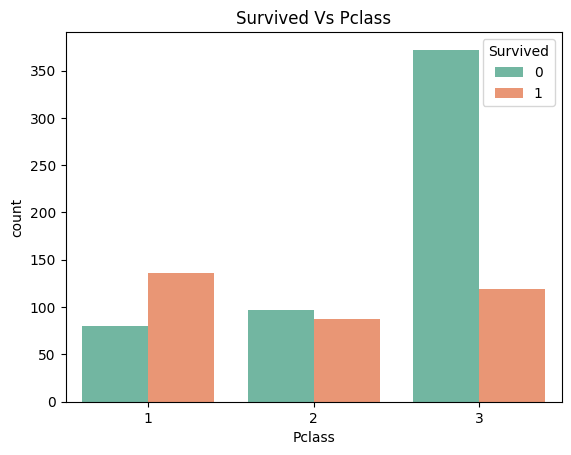

In [60]:
sns.countplot(data=df, x='Pclass', hue='Survived', palette = 'Set2')
plt.title('Survived Vs Pclass')
plt.show()

In [61]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [62]:
df.drop(columns=['Cabin'], inplace = True)

In [63]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked'],
      dtype='object')

In [64]:
df['Age'] = df['Age'].fillna(df['Age'].median())

In [65]:
df['Embarked'] = df['Embarked'].fillna(df['Embarked'].mode()[0])

In [66]:
df.drop(columns = ['PassengerId', 'Name', 'Ticket'], inplace = True)

In [67]:
from sklearn.preprocessing import LabelEncoder
le_sex = LabelEncoder()
df['Sex'] = le_sex.fit_transform(df['Sex'])
le_embarked = LabelEncoder()
df['Embarked'] = le_embarked.fit_transform(df['Embarked'])

In [68]:
le_sex.classes_

array(['female', 'male'], dtype=object)

In [69]:
le_embarked.classes_

array(['C', 'Q', 'S'], dtype=object)

In [70]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 55.8 KB


In [72]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 42)

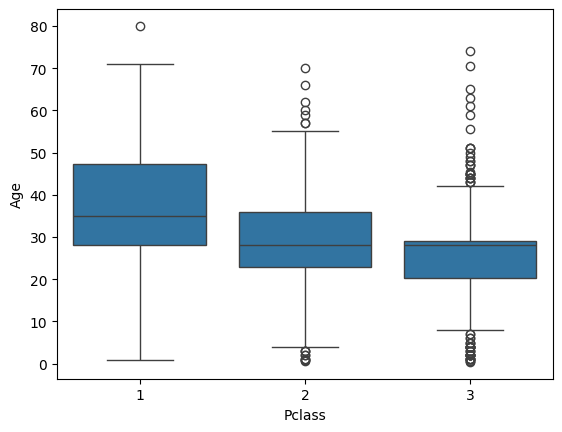

In [73]:
sns.boxplot(data=df, x='Pclass', y='Age' )
plt.show()

In [74]:
# ✅ Step 1: Import model and metrics
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay

In [75]:
# ✅ Step 2: Create model
model = RandomForestClassifier(random_state = 42)

In [76]:
# ✅ Step 3: Train model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [77]:
# ✅ Step 4: Predict on test set
pred_y = model.predict(X_test)

In [78]:
# ✅ Step 5: Evaluate accuracy
acc = accuracy_score(y_test, pred_y)
print(f"accuracy score: {acc*100:.2f}%")

accuracy score: 82.12%


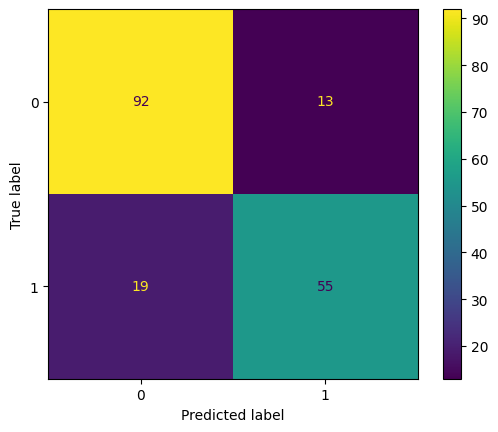

In [79]:
# ✅ Step 6 (Optional): Confusion Matrix
cm = confusion_matrix(y_test, pred_y)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()


In [80]:
for d in [2, 4, 6, 8, None]:
    model = RandomForestClassifier(n_estimators = 100, max_depth = d, random_state = 42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Depth: {d} | accuracy: {acc*100:.2f}%")

Depth: 2 | accuracy: 78.21%
Depth: 4 | accuracy: 82.12%
Depth: 6 | accuracy: 80.45%
Depth: 8 | accuracy: 83.80%
Depth: None | accuracy: 82.12%


In [81]:
model = RandomForestClassifier(max_depth = 8, n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)
print(f"Train accuracy: {model.score(X_train, y_train):.2f}")
print(f"Test accuracy: {model.score(X_test, y_test):.2f}")

Train accuracy: 0.91
Test accuracy: 0.84


In [82]:
model = RandomForestClassifier(max_depth = None, n_estimators = 100, random_state = 42)
model.fit(X_train, y_train)
print(f"Train accuracy: {model.score(X_train, y_train):.2f}")
print(f"Test accuracy: {model.score(X_test, y_test):.2f}")

Train accuracy: 0.98
Test accuracy: 0.82


In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

for split in [2, 5, 10, 20, 30]:
    model = RandomForestClassifier(
        n_estimators = 100,
        max_depth = 8,
        min_samples_split = split,
        random_state = 42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"min_samples_split : {split}, accuracy : {acc*100:.2f}%")

min_samples_split : 2, accuracy : 83.80%
min_samples_split : 5, accuracy : 82.12%
min_samples_split : 10, accuracy : 81.56%
min_samples_split : 20, accuracy : 82.12%
min_samples_split : 30, accuracy : 81.01%


In [84]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

for criteria in ['gini', 'entropy']:
    model = RandomForestClassifier(
        n_estimators = 100,
        criterion = criteria,
        random_state = 42
    )
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"Criteria : {criteria}, accuracy : {acc*100:.2f}%")
    

Criteria : gini, accuracy : 82.12%
Criteria : entropy, accuracy : 82.12%


In [85]:
for n in [100, 200]:
    for d in [None, 6]:
        for c in ['gini', 'entropy']:
            for m in [2, 10]:
                model = RandomForestClassifier(n_estimators=n, max_depth=d, min_samples_split=m, criterion = c, random_state=42)
                model.fit(X_train, y_train)
                y_pred = model.predict(X_test)
                acc = accuracy_score(y_test, y_pred)
                print(f"n={n}, max_depth={d}, min_split={m}, criterion={c} | Accuracy: {acc*100:.2f}%")

n=100, max_depth=None, min_split=2, criterion=gini | Accuracy: 82.12%
n=100, max_depth=None, min_split=10, criterion=gini | Accuracy: 84.36%
n=100, max_depth=None, min_split=2, criterion=entropy | Accuracy: 82.12%
n=100, max_depth=None, min_split=10, criterion=entropy | Accuracy: 83.24%
n=100, max_depth=6, min_split=2, criterion=gini | Accuracy: 80.45%
n=100, max_depth=6, min_split=10, criterion=gini | Accuracy: 81.56%
n=100, max_depth=6, min_split=2, criterion=entropy | Accuracy: 80.45%
n=100, max_depth=6, min_split=10, criterion=entropy | Accuracy: 81.56%
n=200, max_depth=None, min_split=2, criterion=gini | Accuracy: 81.01%
n=200, max_depth=None, min_split=10, criterion=gini | Accuracy: 84.92%
n=200, max_depth=None, min_split=2, criterion=entropy | Accuracy: 81.56%
n=200, max_depth=None, min_split=10, criterion=entropy | Accuracy: 86.03%
n=200, max_depth=6, min_split=2, criterion=gini | Accuracy: 81.56%
n=200, max_depth=6, min_split=10, criterion=gini | Accuracy: 81.56%
n=200, max_de

In [86]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
import numpy as np


model = RandomForestClassifier(
    n_estimators = 200,
    criterion = 'entropy',
    min_samples_split = 10,
    max_depth=None,
    random_state = 42
    )
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
acc = accuracy_score(y_test, y_pred)
print(f"Criteria : {criteria}, accuracy : {acc*100:.2f}%")

# ✅ Perform 5-Fold Cross-Validation
scores = cross_val_score(model, X, y, cv = 5, scoring = 'accuracy')

# ✅ Show Results
print(f"Cross-Validation Scores: {scores}")
print(f"Mean Accuracy: {np.mean(scores)*100:.2f}%")
print(f"Standard Deviation: {np.std(scores)*100:.2f}%")

Criteria : entropy, accuracy : 86.03%
Cross-Validation Scores: [0.79329609 0.80898876 0.87640449 0.79775281 0.85955056]
Mean Accuracy: 82.72%
Standard Deviation: 3.41%
